In [15]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [9]:
name_mapper = {
    "pengwu_net_offline_c3d": "PengWuNet-C3D (Offline)",
    "pengwu_net_offline_i3d": "PengWuNet-I3D (Offline)",
    "pengwu_net_offline_swin": "PengWuNet-Swin (Offline)",
    "pengwu_net_online_c3d": "PengWuNet-C3D (Online)",
    "pengwu_net_online_i3d": "PengWuNet-I3D (Online)",
    "pengwu_net_online_swin": "PengWuNet-Swin (Online)",
    "sultani_net_c3d": "SultaniNet-C3D",
    "sultani_net_i3d": "SultaniNet-I3D",
    "sultani_net_swin": "SultaniNet-Swin",
    "svm_baseline_c3d": "SVM Baseline-C3D",
    "svm_baseline_i3d": "SVM Baseline-I3D",
    "svm_baseline_swin": "SVM Baseline-Swin"
}

In [61]:
results_path = "../results/"

pr_df_c3d, pr_df_i3d, pr_df_swin = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
roc_df_c3d, roc_df_i3d, roc_df_swin = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for rpath in os.listdir(results_path):
    model_name = name_mapper[rpath]
    model_res_file = os.listdir(os.path.join(results_path, rpath))
    
    pr_fpath = [os.path.join(results_path, rpath, res) for res in model_res_file if "pr" in res][0]
    roc_fpath = [os.path.join(results_path, rpath, res) for res in model_res_file if "roc" in res][0]

    pr_data = pd.read_json(pr_fpath, orient="split")
    pr_data["model"] = model_name
    roc_data = pd.read_json(roc_fpath, orient="split")
    roc_data["model"] = model_name

    # Separate DataFrames based on the feature extractor
    if "c3d" in model_name.lower():
        pr_df_c3d = pd.concat([pr_df_c3d, pr_data], ignore_index=True)
        roc_df_c3d = pd.concat([roc_df_c3d, roc_data], ignore_index=True)
    elif "i3d" in model_name.lower():
        pr_df_i3d = pd.concat([pr_df_i3d, pr_data], ignore_index=True)
        roc_df_i3d = pd.concat([roc_df_i3d, roc_data], ignore_index=True)
    elif "swin" in model_name.lower():
        pr_df_swin = pd.concat([pr_df_swin, pr_data], ignore_index=True)
        roc_df_swin = pd.concat([roc_df_swin, roc_data], ignore_index=True)
    

In [65]:
pr_df_c3d.head(), roc_df_c3d.head()

(   recall  precision        ap  epoch                    model
 0     1.0   0.229207  0.555506     14  PengWuNet-C3D (Offline)
 1     1.0   0.229225  0.555506     14  PengWuNet-C3D (Offline)
 2     1.0   0.229247  0.555506     14  PengWuNet-C3D (Offline)
 3     1.0   0.229269  0.555506     14  PengWuNet-C3D (Offline)
 4     1.0   0.229291  0.555506     14  PengWuNet-C3D (Offline),
         fpr       tpr   rocauc  epoch                    model
 0  0.000000  0.000000  0.88287     14  PengWuNet-C3D (Offline)
 1  0.008345  0.015153  0.88287     14  PengWuNet-C3D (Offline)
 2  0.011246  0.038863  0.88287     14  PengWuNet-C3D (Offline)
 3  0.012137  0.040684  0.88287     14  PengWuNet-C3D (Offline)
 4  0.013618  0.042716  0.88287     14  PengWuNet-C3D (Offline))

In [66]:
pr_df_i3d.head(), roc_df_i3d.head()

(   recall  precision        ap  epoch                    model
 0     1.0   0.227949  0.750805     38  PengWuNet-I3D (Offline)
 1     1.0   0.233836  0.750805     38  PengWuNet-I3D (Offline)
 2     1.0   0.233862  0.750805     38  PengWuNet-I3D (Offline)
 3     1.0   0.233881  0.750805     38  PengWuNet-I3D (Offline)
 4     1.0   0.233907  0.750805     38  PengWuNet-I3D (Offline),
         fpr       tpr    rocauc  epoch                    model
 0  0.000000  0.000000  0.919723     38  PengWuNet-I3D (Offline)
 1  0.000009  0.006507  0.919723     38  PengWuNet-I3D (Offline)
 2  0.000025  0.011092  0.919723     38  PengWuNet-I3D (Offline)
 3  0.000025  0.011805  0.919723     38  PengWuNet-I3D (Offline)
 4  0.000025  0.012281  0.919723     38  PengWuNet-I3D (Offline))

In [67]:
pr_df_swin.head(), roc_df_swin.head()

(   recall  precision        ap  epoch                     model
 0     1.0   0.227949  0.791791      4  PengWuNet-Swin (Offline)
 1     1.0   0.227967  0.791791      4  PengWuNet-Swin (Offline)
 2     1.0   0.227992  0.791791      4  PengWuNet-Swin (Offline)
 3     1.0   0.228017  0.791791      4  PengWuNet-Swin (Offline)
 4     1.0   0.228035  0.791791      4  PengWuNet-Swin (Offline),
    fpr       tpr   rocauc  epoch                     model
 0  0.0  0.000000  0.93041      4  PengWuNet-Swin (Offline)
 1  0.0  0.000119  0.93041      4  PengWuNet-Swin (Offline)
 2  0.0  0.006895  0.93041      4  PengWuNet-Swin (Offline)
 3  0.0  0.007133  0.93041      4  PengWuNet-Swin (Offline)
 4  0.0  0.009630  0.93041      4  PengWuNet-Swin (Offline))

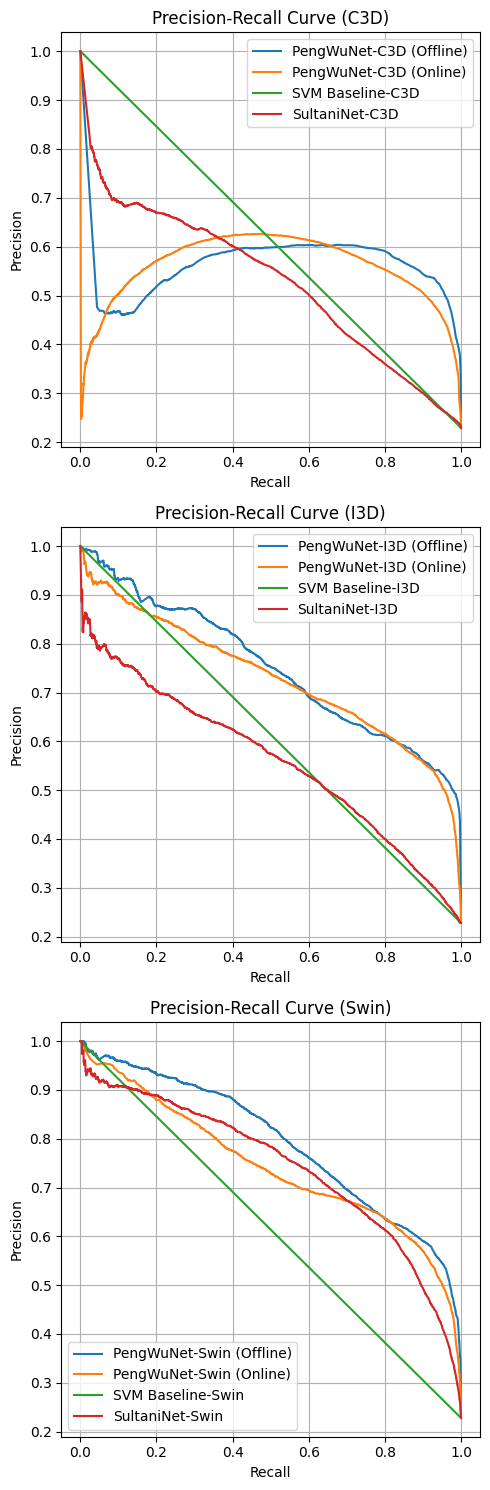

In [87]:
# Plot PR curves
plt.figure(figsize=(5, 15))

plt.subplot(3, 1, 1)
for model_name, group in pr_df_c3d.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=model_name, linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (C3D)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
for model_name, group in pr_df_i3d.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=model_name, linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (I3D)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
for model_name, group in pr_df_swin.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=model_name, linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Swin)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

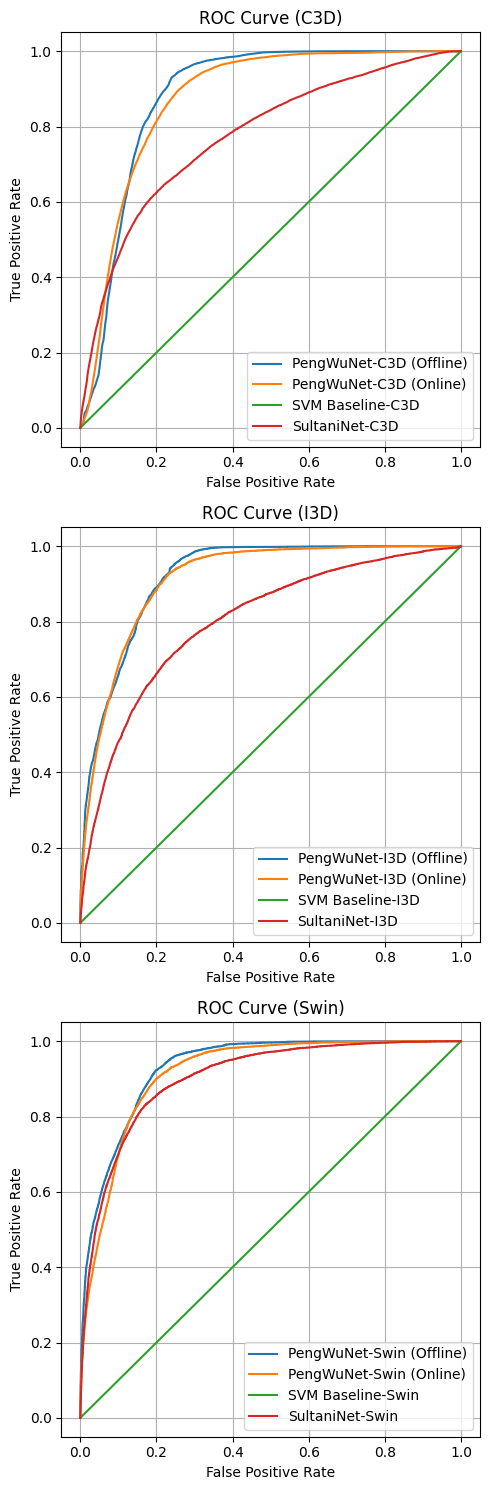

In [88]:
# Plot ROC curves
plt.figure(figsize=(5, 15))

plt.subplot(3, 1, 1)
for model_name, group in roc_df_c3d.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=model_name, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (C3D)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
for model_name, group in roc_df_i3d.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=model_name, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (I3D)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
for model_name, group in roc_df_swin.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=model_name, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Swin)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


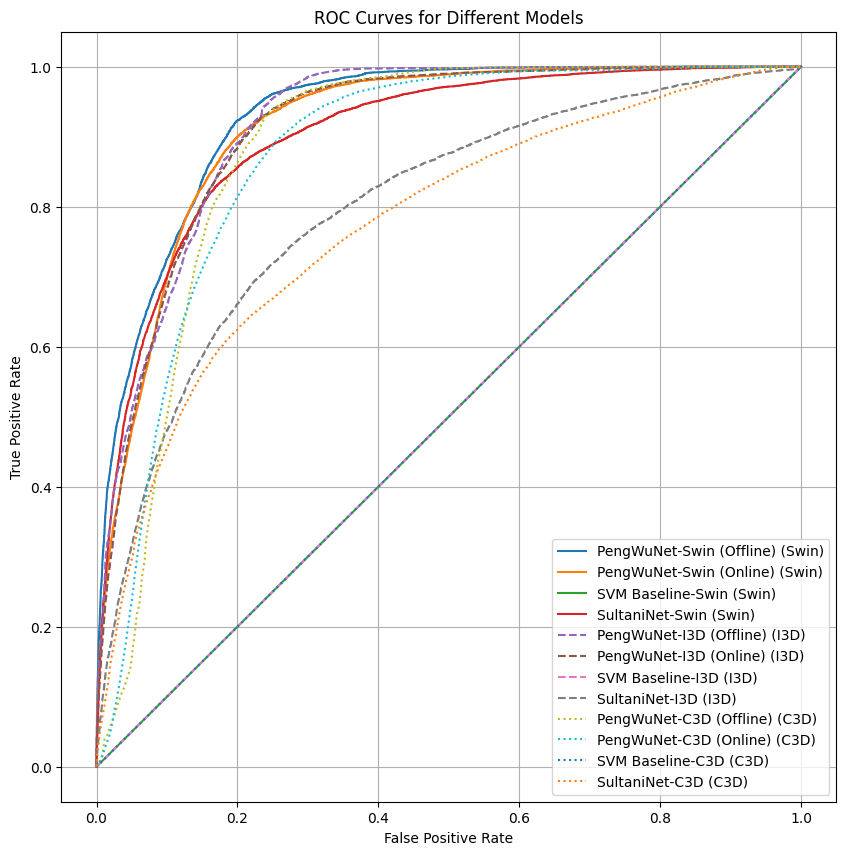

In [93]:
# Plot all ROC curves together
plt.figure(figsize=(10, 10))

for model_name, group in roc_df_swin.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=f'{model_name} (Swin)', linestyle='-')

for model_name, group in roc_df_i3d.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=f'{model_name} (I3D)', linestyle='--')

for model_name, group in roc_df_c3d.groupby("model"):
    plt.plot(group["fpr"], group["tpr"], label=f'{model_name} (C3D)', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.grid(True)
plt.legend()
plt.show()


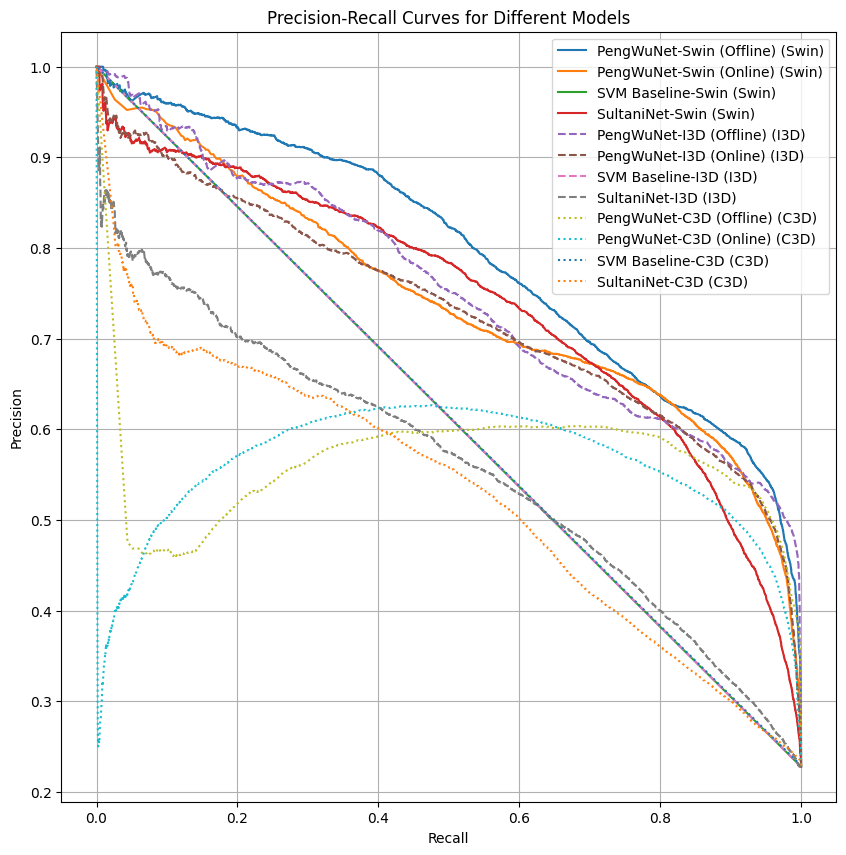

In [94]:
# Plot all PR curves together
plt.figure(figsize=(10, 10))

for model_name, group in pr_df_swin.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=f'{model_name} (Swin)', linestyle='-')

for model_name, group in pr_df_i3d.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=f'{model_name} (I3D)', linestyle='--')

for model_name, group in pr_df_c3d.groupby("model"):
    plt.plot(group["recall"], group["precision"], label=f'{model_name} (C3D)', linestyle=':')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.grid(True)
plt.legend()
plt.show()
